### Cleaning To Make Clean Dataset for Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #just to makes sure all columns are visible
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Tissue_dataset_2019_2023.csv')

/var/folders/rr/4wp1syc10818wgtwwcq7_nvw0000gn/T/ipykernel_21969/3928253277.py:1: DtypeWarning: Columns (14,33,39,70,77,78,84,87,89,90,91,93,94,95,96,100,107,108,109,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Tissue_dataset_2019_2023.csv')


I am taking a preliminary look at how my consolidated data look like via looking at the column heads to understand what kind of information I have in here.

In [3]:
df.head()

,ProgramName,ParentProjectName,ProjectCode,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissuePrep,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Matrix,Method,Analyte,Unit,Result,ResQualCode,MDL,RL,QACode,BatchVerification,ComplianceCode,DilutionFactor,LabSampleID,ResultComments,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeComments,LabBatch,LabBatchComments,AnalyzingAgency,SubmittingAgency,LabSubmissionCode,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,LatestDateSampled,SampleDateRange(Days),SampleDate,CollectionTime,TissueResultRowID,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,CompositeCompositeID,CompositeStationName,CompositeStationCode,CompositeLatitude,CompositeLongitude,CompositeGeometryShape,CompositeSampleDate,CompositeProgramName,CompositeCompositeType,CompositeCommonName,CompositeFinalID,CompositeTissuePrep,CompositeTissueName,CompositeSampleTypeCode,SamplingAgency,GroupSample,ProtocolCode,LocationCode,HydroModLoc,Hydromod,CollectionReplicate,CollectionMethodName,CollectionDeviceName,OrganismID,TotalCount,TagNumber,ForkLength,TotalLength,LengthSource,OrganismWeight,UnitLengthFish,UnitWeightFish,WeightSource,SizeDescr,Age,Sex,Anomaly,ProcessedOrganismsExpandedComments,TissueID,TissueWeight,UnitTissueWeight,PartsComments,CompAgency,CompositeWeight,UnitCompositeWeight,HomogonizedDate,CompositeRowID,PersonnelCode,SampleComments,TissueCollectionComments,LocationDetailTIComments,CompositeJunctionRowID,TLMin(mm),DWC_AnalyteWFraction,SampleID,DataQuality,DataQualityIndicator,Datum
0,Surface Water Ambient Monitoring Program,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209001,-117.401035,PolygonCent,04/19/2023,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,4.0,Composite,1.0,1.0,tissue,EPA 200.8m,Arsenic,ug/g ww,8.46,=,0.06,0.18,NaN,VAC,Com,1.0,C122OCHLOB,NaN,FieldFrozen,04/19/2023,EPA 3052M,06/22/2023,06/27/2023,"4 lobsters; 62.03g Arc1, 59.58g Arc2(PFAS), 63...",MPSL-DFW_2023Dig41_T_TM,NaN,MPSL-DFW,MPSL-DFW,A,Crustacean,411.0,84.0,76.0,85.714286,"Unk (0), M (2), F (2)",04/19/2023,0.0,2023/04/19,21:30,F8297F92-4969-466B-80B6-677163F87D09,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209,-117.401,PolygonCent,04/19/2023,Surface Water Ambient Monitoring Program,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,Composite,Marine Pollution Studies Laboratory-DFW,NaN,BMP_Realign_RWB9_21,OpenWaterTrap1,NaN,NaN,1.0,Trap,FishTrap,90208OCNHRLN22LOB01-03,1.0,RLN22LOB22,-88.0,84.0,Field,544.0,mm,g,Field,NaN,NR,F,NaN,carapace length in TL column,RLN22LOB22_C,337.41,g,NaN,MPSL-DFW,1008.82,g,05/15/2023,5900C737-1E15-4F1E-AAEB-4F3D49D9C492,NaN,NaN,NaN,NaN,6B5F75AA-A482-4603-AFD7-799E12E69089,72.0,"Arsenic, Total",NaN,Passed,NaN,WGS84
1,Surface Water Ambient Monitoring Program,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209001,-117.401035,PolygonCent,04/19/2023,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,4.0,Composite,1.0,1.0,tissue,EPA 200.8m,Arsenic,ug/g ww,8.46,=,0.06,0.18,NaN,VAC,Com,1.0,C122OCHLOB,NaN,FieldFrozen,04/19/2023,EPA 3052M,06/22/2023,06/27/2023,"4 lobsters; 62.03g Arc1, 59.58g Arc2(PFAS), 63...",MPSL-DFW_2023Dig41_T_TM,NaN,MPSL-DFW,MPSL-DFW,A,Crustacean,411.0,84.0,76.0,85.714286,"Unk (0), M (2), F (2)",04/19/2023,0.0,2023/04/19,21:30,F8297F92-4969-466B-80B6-677163F87D09,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study

Taking a quick glace at the distribution of my null values. Some columns shows a very high percentage of null values, but if they are non-critical columns, it should be ok. I am a little nervous about the 42% of null values within the "Results" column as it is over the 30% threshold. I will have to dig into it a little bit more to understand how much that would affect my analysis.

In [4]:
df.isna().mean()*100

ProgramName                             0.000000
ParentProjectName                       0.000000
ProjectCode                             0.000000
ProjectName                             0.000000
CompositeID                             0.000000
StationName                             0.000000
StationCode                             0.000000
Latitude                                0.000000
Longitude                               0.000000
GeometryShape                           6.911073
EarliestDateSampled                     0.000000
CompositeType                           0.000000
CommonName                              0.000000
FinalID                                 0.000000
TissuePrep                             22.949580
TissueName                              0.000000
NumberFishperComp                       0.035517
SampleTypeCode                          0.000000
CompositeReplicate                      0.000000
ResultReplicate                         0.000000
Matrix              

In [5]:
df.shape # this is a lot of columns and rows

(216797, 117)

Some of the key information I could pick up from the headers are: CommonName(Species), Analytes(Chemicals), Result(Analytes results), StationName(Locations), Latitude, Longitude,CompositeType,TissueName, SampleDate, Sex,WeightAvg(g),TLAvgLength(mm).

These are key informations to have since the analysis is mainly focused on the levels of harmful chemical presence in which species and at what location, in order to help us get a general sense of which waterbody that samples has been taken from seems to be the most polluted. Where in the tissue was taken from the organism, its size (lenght & mass), as well as sex, plays a role in the bioacculation affects of the chemicals.

In [6]:
df2 = df.sample(frac=0.2) #taking a fraction of the main data to look through, taking a 20% sample

In [7]:
df2.reset_index(drop=True, inplace=True)

In [8]:
df2.head()

,ProgramName,ParentProjectName,ProjectCode,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissuePrep,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Matrix,Method,Analyte,Unit,Result,ResQualCode,MDL,RL,QACode,BatchVerification,ComplianceCode,DilutionFactor,LabSampleID,ResultComments,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeComments,LabBatch,LabBatchComments,AnalyzingAgency,SubmittingAgency,LabSubmissionCode,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,LatestDateSampled,SampleDateRange(Days),SampleDate,CollectionTime,TissueResultRowID,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,CompositeCompositeID,CompositeStationName,CompositeStationCode,CompositeLatitude,CompositeLongitude,CompositeGeometryShape,CompositeSampleDate,CompositeProgramName,CompositeCompositeType,CompositeCommonName,CompositeFinalID,CompositeTissuePrep,CompositeTissueName,CompositeSampleTypeCode,SamplingAgency,GroupSample,ProtocolCode,LocationCode,HydroModLoc,Hydromod,CollectionReplicate,CollectionMethodName,CollectionDeviceName,OrganismID,TotalCount,TagNumber,ForkLength,TotalLength,LengthSource,OrganismWeight,UnitLengthFish,UnitWeightFish,WeightSource,SizeDescr,Age,Sex,Anomaly,ProcessedOrganismsExpandedComments,TissueID,TissueWeight,UnitTissueWeight,PartsComments,CompAgency,CompositeWeight,UnitCompositeWeight,HomogonizedDate,CompositeRowID,PersonnelCode,SampleComments,TissueCollectionComments,LocationDetailTIComments,CompositeJunctionRowID,TLMin(mm),DWC_AnalyteWFraction,SampleID,DataQuality,DataQualityIndicator,Datum
0,Surface Water Ambient Monitoring Program,SWAMP Sportfish Contamination in Lakes and Resrv,SWB_FishLk_2021,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.329200,-117.321700,Polygon,09/22/2021,normal,Channel Catfish,Ictalurus punctatus,Skin off,fillet,4.0,Composite,1.0,1.0,tissue,EPA 1668AM,PCB 145,ug/Kg ww,NaN,ND,0.000058,0.00232,IDA,VQI,Com,1.0,L37443-13 R,NaN,FieldFrozen,09/22/2021,EPA 1668AM,08/17/2022,12/05/2022,"4 fish; Arc1 65.72, Arc2(PFAs) 63.62, Arc3 66.26",WG82287_AXYS_T_PCB_2,IQC: Incomplete batch: no Dups or QC. Analysis...,AXYS,Babcock,QN,Fish,831.250000,474.0,462.000000,92.194093,"Unk (2), M (2), F (0)",09/22/2021,0.0,2021/09/22,08:30,95B70B52-FAE6-4121-B351-10EE0F37DC37,SWAMP Sportfish Contamination in Lakes and Resrv,SWB_FishLk_2021,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.3292,-117.322,Polygon,09/22/2021,Surface Water Ambient Monitoring Program,normal,Channel Catfish,Ictalurus punctatus,Skin off,fillet,Composite,AXYS Analytical Services Ltd.,NaN,BOG-Lakes,Location1Shock1,WI,GradeCont,1.0,Shock,Smith & Root Electric Shock Boat (Economy Model),902ONEILLBOG21CHC01-01,1.0,B8072,418.0,472.0,Field,980.0,mm,g,Field,NaN,NR,Unk,NaN,NaN,BOG21_B8072_C,79.63,g,NaN,MPSL-DFW,318.50,g,02/15/2022,8C917213-C949-4C6D-900B-F8601B0490D1,NaN,NaN,shocked entire lake,NaN,1D6B4D49-E24C-4660-AD62-3204A43F7046,437.0,"PCB 145, Total",NaN,Extensive review needed,BatchVerification:VQI,NAD83
1,Surface Water Ambient Monitoring Program,SWAMP RWB3 CCAMP SpecialStudies,RWB3_SS_BOG,RWB3 Special Studies BOG,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.961441,-122.021655,Point,08/10/2020,normal,Northern Anchovy,Engraulis mordax,"Skin on, Scales Off","whole without Head, Tail and Guts",36.0,Composite,1.0,1.0,tissue,EPA 8270B,Fenitrothion,ug/g ww,NaN,ND,0.181000,0.36300,VIU,"VAC,VMD",Qual,1.0,2011048-01,NaN,FieldFrozen,08/10/2020,EPA 3550C,12/16/2020,12/23/2020,"36 fish; insufficient material, no archive cre...",DeltaEnv_21A0005_T_OP,IQC: Accuracy issue with Lab Control Samples i...,DeltaEnv,DeltaEnv,"A,MD",Fish,8.741667,129.0,113.416667,74.418605,"Unk (36), M (0), F (0)",08/10/2020,0.0,2020/08/10,06:55,91B3B214-B1FE-46BE-9776-81FAACF7E0D6

In [9]:
df2.shape # much more managable after taking a 20% random sample to work with

(43359, 117)

In [10]:
null_counts = df2.isnull().sum().sum()
null_counts 

788184

In [11]:
counts = df2.count().sum() #total value counts in dataframe
counts

4284819

In [12]:
null_counts/(counts+null_counts) # total amounts of values in DF
#Still a pretty high amount of null values, but 37% I can work with 

0.15536832917307558

Next I want to look into our three most important columns - CommonName, Analyte, & StationName to get a sense of what kind of general group would be needed

In [13]:
df2['Analyte'].nunique()

623

In [14]:
df2['Analyte'].unique()

array(['PCB 145', 'Fenitrothion', 'PCB 077', 'PCB 186', 'Mercury',
       'PCB 157', 'PCB 153/168', 'Ethoprop', 'PCB 190', 'PCB 081',
       'Moisture', 'PCB 177', 'Selenium', 'PCB 022', 'PCB 201', 'Aldrin',
       'PCB 196', 'PBDE 066', 'Hexachlorobenzene', 'PCB 119', 'PCB 001',
       'PCB 070', 'PCB 144', 'Fenchlorphos', 'PBDE 209', 'PCB 206',
       'Endrin Aldehyde', 'PCB 180', 'PCB 148', 'PCB 026/29',
       'Terphenyl-d14(Surrogate)', 'PBDE 047', 'Age',
       'PBDE 154-13C12(IsoDilAnalogue)', 'PCB AROCLOR 1260', 'PCB 096',
       'PCB 031', 'PCB 029', 'Mirex', 'PCB 016',
       'Nonachlor-13C10, cis-(IsoDilAnalogue)', 'PCB 110/115',
       'PCB 180-13C12(IsoDilAnalogue)', 'PCB 183/185', 'PBDE 183',
       'PCB 208-13C12(IsoDilAnalogue)', 'PCB 043', 'Zinc', 'PCB 161',
       'Endrin Ketone', 'PCB 129/138/160/163', 'Mercury, Methyl',
       'Endrin', 'PCB 064', 'PCB 152', 'PCB 009', 'PBDE 206',
       'PCB 093/95/98/100/102', 'PCB 162', 'PCB 082', 'Chlordane, trans-',
       'PBD

In [15]:
df2['CommonName'].nunique()

96

In [16]:
df2['StationName'].nunique()

220

In [17]:
column_list = df.columns.tolist()
column_list

['ProgramName',
 'ParentProjectName',
 'ProjectCode',
 'ProjectName',
 'CompositeID',
 'StationName',
 'StationCode',
 'Latitude',
 'Longitude',
 'GeometryShape',
 'EarliestDateSampled',
 'CompositeType',
 'CommonName',
 'FinalID',
 'TissuePrep',
 'TissueName',
 'NumberFishperComp',
 'SampleTypeCode',
 'CompositeReplicate',
 'ResultReplicate',
 'Matrix',
 'Method',
 'Analyte',
 'Unit',
 'Result',
 'ResQualCode',
 'MDL',
 'RL',
 'QACode',
 'BatchVerification',
 'ComplianceCode',
 'DilutionFactor',
 'LabSampleID',
 'ResultComments',
 'PrepPreservationName',
 'PrepPreservationDate',
 'DigestExtractMethod',
 'DigestExtractDate',
 'AnalysisDate',
 'CompositeComments',
 'LabBatch',
 'LabBatchComments',
 'AnalyzingAgency',
 'SubmittingAgency',
 'LabSubmissionCode',
 'OrganismGroup',
 'WeightAvg(g)',
 'TLMax(mm)',
 'TLAvgLength(mm)',
 'CompSizeCheck',
 'SexSummary',
 'LatestDateSampled',
 'SampleDateRange(Days)',
 'SampleDate',
 'CollectionTime',
 'TissueResultRowID',
 'CompositeParentProjectN

To begin data cleaning, I am looking at columns that I can drop. Couple reasons for doing this is 1) if I drop columns that are not needed for analysis and contains lots of null values, that would take care of some of the null values we see above, 2) it condenses the dataframe into a more managable size for my computer to handle


Since I mainly want to focus on correlations between analyte, species, location, and time, I can drop a lot of fields that are unrelated to those values. The data that we want to focus on is the field data, not the lab research methods data. Here are the list of the columns I will be dropping and why. 

Dictionary of columns could be found here: https://data.ca.gov/dataset/surface-water-aquatic-organism-tissue-sample-results/resource/206da2ff-70f2-4f56-aacc-2a39ef3bf15b

Data that is not core for the purpose of this analysis would be: tissue sample preparation methods, internal codes used for agency reporting, columns that are all nulls, comments regarding lab analysis methods, and project agencies information. 

After prelimary EDA, I can decide if any more layers is needed and can add any of these columns back in. But for now, I can drop them to focus on the core columns mentioned above.

Columns about sample prep methods:
TissuePrep,Matrix,Method,DilutionFactor,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeTissuePrep,CollectionMethodName,CollectionDeviceName,LengthSource,WeightSource,Datum,MDL,RL,CollectionTime

Columns containing internal compliance/quality codes:
QACode,QACode,BatchVerification,ComplianceCode,LabSampleID,LabSubmissionCode,GroupSample,HydroModLoc,TagNumber,CompositeRowID,PersonnelCode,DWC_AnalyteWFraction,ResQualCode,OrganismID,TissueID
 
Columns that are mostly null and does not pertain critical information:
ResultComments,CompositeJunctionRowID,SampleID,SizeDescr

Columns that are comments regarding lab analysis methods:
LabBatchComments,CompositeComments,ProcessedOrganismsExpandedComments,PartsComments,SampleComments,TissueCollectionComments,LocationDetailTIComments,DataQuality,DataQualityIndicator

Columns about agencies:
CompAgency,AnalyzingAgency,SubmittingAgency,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,SamplingAgency,ProgramName,ParentProjectName,ProjectCode	

In [18]:
drop_list = ['TissuePrep',
 'Matrix',
 'Method',
 'QACode',
 'BatchVerification',
 'ComplianceCode',
 'DilutionFactor',
 'LabSampleID',
 'ResultComments',
 'PrepPreservationName',
 'PrepPreservationDate',
 'DigestExtractMethod',
 'DigestExtractDate',
 'AnalysisDate',
 'CompositeComments',
 'LabBatch',
 'LabBatchComments',
 'AnalyzingAgency',
 'SubmittingAgency',
 'LabSubmissionCode',
 'LatestDateSampled',
 'SampleDateRange(Days)',
 'SampleDate',
 'CollectionTime',
 'CompositeParentProjectName',
 'CompositeProjectCode',
 'CompositeProjectName',
 'CompositeSampleDate',
 'CompositeProgramName',
 'CompositeTissuePrep',
 'SamplingAgency',
 'GroupSample',
 'ProtocolCode',
 'LocationCode',
 'HydroModLoc',
 'Hydromod',
 'CollectionMethodName',
 'CollectionDeviceName',
 'TagNumber',
 'LengthSource',
 'WeightSource',
 'Anomaly',
 'ProcessedOrganismsExpandedComments',
 'PartsComments',
 'CompAgency',
 'CompositeRowID',
 'PersonnelCode',
 'SampleComments',
 'TissueCollectionComments',
 'LocationDetailTIComments',
 'CompositeJunctionRowID',
 'DWC_AnalyteWFraction',
 'DataQuality',
 'DataQualityIndicator',
 'Datum',
 'SampleID',
 'SizeDescr',
 'ResQualCode',	
 'MDL',	
 'RL',
 'OrganismID',
 'TissueID',
 'ProgramName',
 'ParentProjectName',
 'ProjectCode']

len(drop_list)

65

In [19]:
df2 = df2.drop(columns = drop_list)
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeCompositeID,CompositeStationName,CompositeStationCode,CompositeLatitude,CompositeLongitude,CompositeGeometryShape,CompositeCompositeType,CompositeCommonName,CompositeFinalID,CompositeTissueName,CompositeSampleTypeCode,CollectionReplicate,TotalCount,ForkLength,TotalLength,OrganismWeight,UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight,UnitTissueWeight,CompositeWeight,UnitCompositeWeight,HomogonizedDate,TLMin(mm)
0,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.329200,-117.321700,Polygon,09/22/2021,normal,Channel Catfish,Ictalurus punctatus,fillet,4.0,Composite,1.0,1.0,PCB 145,ug/Kg ww,NaN,Fish,831.250000,474.0,462.000000,92.194093,"Unk (2), M (2), F (0)",95B70B52-FAE6-4121-B351-10EE0F37DC37,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.3292,-117.322,Polygon,normal,Channel Catfish,Ictalurus punctatus,fillet,Composite,1.0,1.0,418.0,472.0,980.0,mm,g,NR,Unk,79.63,g,318.50,g,02/15/2022,437.0
1,RWB3 Special Studies BOG,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.961441,-122.021655,Point,08/10/2020,normal,Northern Anchovy,Engraulis mordax,"whole without Head, Tail and Guts",36.0,Composite,1.0,1.0,Fenitrothion,ug/g ww,NaN,Fish,8.741667,129.0,113.416667,74.418605,"Unk (36), M (0), F (0)",91B3B214-B1FE-46BE-9776-81FAACF7E0D6,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.9614,-122.022,Point,normal,Northern Anchovy,Engraulis mordax,"whole without Head, Tail and Guts",Composite,1.0,1.0,109.0,120.0,10.6,mm,g,NR,LAB,6.59,g,198.15,g,09/02/2020,96.0
2,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_206PLC157BOG21LMB,Lake Chabot (Vallejo),206PLC157,38.136180,-122.235650,PolygonCent,07/06/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 077,ug/Kg ww,0.0117,Fish,725.000000,371.0,350.400000,83.288410,"Unk (5), M (0), F (0)",11EB9710-1323-4512-929C-B23DCEFFCB28,C1_206PLC157BOG21LMB,Lake Chabot (Vallejo),206PLC157,38.1362,-122.236,PolygonCent,normal,Largemouth Bass,Micropterus salmoides,fillet,Composite,1.0,1.0,348.0,359.0,805.0,mm,g,NR,LAB,58.32,g,291.60,g,11/30/2021,309.0
3,RWB9 San Diego Bay Tissue Age Study 2020,C5_91202SDSBR920JKS,SD South Bay,91202SDSB,32.667880,-117.144199,PolygonCent,11/10/2020,normal,Jacksmelt,Atherinopsis californiensis,fillet,5.0,Composite,1.0,1.0,PCB 186,ug/Kg ww,NaN,Fish,29.692000,163.0,159.200000,93.251534,"Unk (5), M (0), F (0)",98B0987B-126E-48D1-9DE6-A1A40CE38E2F,C5_91202SDSBR920JKS,SD South Bay,91202SDSB,32.6679,-117.144,PolygonCent,normal,Jacksmelt,Atherinopsis californiensis,fillet,Composite,1.0,1.0,146.0,159.0,29.3,mm,g,NR,LAB,7.06,g,35.30,g,04/21/2021,152.0
4,SWB Long-Term Monitoring of Bass Lk_Res 2023,P1_801GHLLL1BMP23LMB,"Glen Helen Regional Park, Large Lake",801GHLLL1,34.208591,-117.404638,Point,06/05/2023,normal,Largemouth Bass,Micropterus salmoides,whole organism,10.0,Composite,1.0,1.0,Mercury,ug/g ww,0.0080,Fish,2.350000,75.0,54.200000,54.666667,"Unk (10), M (0), F (0)",D4341EA2-54DF-4A23-97CD-795B2BF89BAE,P1_801GHLLL1BMP23LMB,"Glen Helen Regional Park, Large Lake",801GHLLL1,34.2086,-117.405,Point,normal,Largemouth Bass,Micropterus salmoides,whole organism,Composite,1.0,1.0,49.0,50.0,1.6,mm,g,NR,NR,1.60,g,23.50,g,07/06/2023,41.0


In [20]:
df2.shape #now we are down to 52 columns instead of the original 117

(43359, 52)

Next, I will look at columns that could hold duplicate information. These columns look like good candidates to example since their headers are almost the same, except one is information on the composite. A composite is when researchers take tissues of multiple critters from the same species in the same location within a small timeframe, and combine them into a single sample to analyze. Lots of times this method is used to analyze smaller organisms such as clams. It is very likely that these columns hold same information.

In [21]:
#set 1 is the column to keep 
set_1 = ['CompositeID',
 'StationName',
 'StationCode',
 'Latitude',
 'Longitude',
 'CompositeType',
 'CommonName',
 'FinalID',
 'TissueName',
 'SampleTypeCode',
 'CompositeReplicate',
 'GeometryShape']

#set 2 is the columns to drop is it contains duplicated values as columns in set 1
set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeLatitude',
 'CompositeLongitude',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']

print(len(set_1), len(set_2))

12 12


In [22]:
for i in range(len(set_1)): # range function iterates down the length of list
    compare1 = df2[set_1[i]].isin(df2[set_2[i]]) # compares values of columns in set 1 to values of columns in set 2
    print(compare1.value_counts())


CompositeID
True    43359
Name: count, dtype: int64
StationName
True    43359
Name: count, dtype: int64
StationCode
True    43359
Name: count, dtype: int64
Latitude
False    36682
True      6677
Name: count, dtype: int64
Longitude
False    41969
True      1390
Name: count, dtype: int64
CompositeType
True    43359
Name: count, dtype: int64
CommonName
True    43359
Name: count, dtype: int64
FinalID
True    43359
Name: count, dtype: int64
TissueName
True    43359
Name: count, dtype: int64
SampleTypeCode
True    43359
Name: count, dtype: int64
CompositeReplicate
True    43359
Name: count, dtype: int64
GeometryShape
True    43359
Name: count, dtype: int64


In [23]:
# I removed 'CompositeStationCode' and 'CompositeLatitude'from the drop list since they are showing false matches with the latitude & longitude columns
drop_set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']
df2 = df2.drop(columns = drop_set_2) # I can now drop these
df2.head()


,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight,UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight,UnitTissueWeight,CompositeWeight,UnitCompositeWeight,HomogonizedDate,TLMin(mm)
0,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.329200,-117.321700,Polygon,09/22/2021,normal,Channel Catfish,Ictalurus punctatus,fillet,4.0,Composite,1.0,1.0,PCB 145,ug/Kg ww,NaN,Fish,831.250000,474.0,462.000000,92.194093,"Unk (2), M (2), F (0)",95B70B52-FAE6-4121-B351-10EE0F37DC37,33.3292,-117.322,1.0,418.0,472.0,980.0,mm,g,NR,Unk,79.63,g,318.50,g,02/15/2022,437.0
1,RWB3 Special Studies BOG,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.961441,-122.021655,Point,08/10/2020,normal,Northern Anchovy,Engraulis mordax,"whole without Head, Tail and Guts",36.0,Composite,1.0,1.0,Fenitrothion,ug/g ww,NaN,Fish,8.741667,129.0,113.416667,74.418605,"Unk (36), M (0), F (0)",91B3B214-B1FE-46BE-9776-81FAACF7E0D6,36.9614,-122.022,1.0,109.0,120.0,10.6,mm,g,NR,LAB,6.59,g,198.15,g,09/02/2020,96.0
2,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_206PLC157BOG21LMB,Lake Chabot (Vallejo),206PLC157,38.136180,-122.235650,PolygonCent,07/06/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 077,ug/Kg ww,0.0117,Fish,725.000000,371.0,350.400000,83.288410,"Unk (5), M (0), F (0)",11EB9710-1323-4512-929C-B23DCEFFCB28,38.1362,-122.236,1.0,348.0,359.0,805.0,mm,g,NR,LAB,58.32,g,291.60,g,11/30/2021,309.0
3,RWB9 San Diego Bay Tissue Age Study 2020,C5_91202SDSBR920JKS,SD South Bay,91202SDSB,32.667880,-117.144199,PolygonCent,11/10/2020,normal,Jacksmelt,Atherinopsis californiensis,fillet,5.0,Composite,1.0,1.0,PCB 186,ug/Kg ww,NaN,Fish,29.692000,163.0,159.200000,93.251534,"Unk (5), M (0), F (0)",98B0987B-126E-48D1-9DE6-A1A40CE38E2F,32.6679,-117.144,1.0,146.0,159.0,29.3,mm,g,NR,LAB,7.06,g,35.30,g,04/21/2021,152.0
4,SWB Long-Term Monitoring of Bass Lk_Res 2023,P1_801GHLLL1BMP23LMB,"Glen Helen Regional Park, Large Lake",801GHLLL1,34.208591,-117.404638,Point,06/05/2023,normal,Largemouth Bass,Micropterus salmoides,whole organism,10.0,Composite,1.0,1.0,Mercury,ug/g ww,0.0080,Fish,2.350000,75.0,54.200000,54.666667,"Unk (10), M (0), F (0)",D4341EA2-54DF-4A23-97CD-795B2BF89BAE,34.2086,-117.405,1.0,49.0,50.0,1.6,mm,g,NR,NR,1.60,g,23.50,g,07/06/2023,41.0


I find it curious that the longitude & latitdue columns are returning some false matches because the StationName for both non-composite and composite samples are the same. It could be some keying errors causing that issue. It is worth it to investigate later on.

In [24]:
df2.shape # the columns in set 2 are dropped

(43359, 42)

For this particular column, FinalID, I have a feeling that it is holding the scientific name for the CommonName. To further prove it, I grouped the dataset by the CommonName to see how many unique values of FinalID would show up. It is a 1:1 relationship.

In [25]:
df2.groupby(['CommonName'])['FinalID'].unique() #CommonName & FinalID actually shows same information, FinalID is just the scientific name

CommonName
Asiatic Clam                           [Potamocorbula amurensis]
Barred Sand Bass                          [Paralabrax nebulifer]
Barred Surfperch                        [Amphistichus argenteus]
Black Crappie                           [Pomoxis nigromaculatus]
Black Perch                                 [Embiotoca jacksoni]
Black Rockfish                               [Sebastes melanops]
Blue Catfish                                [Ictalurus furcatus]
Blue Rockfish                                [Sebastes mystinus]
Bluegill                                   [Lepomis macrochirus]
Brown Bullhead                              [Ameiurus nebulosus]
Brown Rockfish                            [Sebastes auriculatus]
Brown Trout                                       [Salmo trutta]
California Corbina                      [Menticirrhus undulatus]
California Halibut                   [Paralichthys californicus]
California Mussel                        [Mytilus californianus]
California Spi

In [26]:
df2 = df2.drop(columns = ['FinalID']) # I can now drop these

In [27]:
df2.shape

(43359, 41)

Next, I am looking at the columns that hold the measurement unit to see what's in there. I have noticed that for all the mass measurements, the measurement unit is embedded within the column head, i.e.  WeightAvg(g). This gives me a feeling that there are numeric results that represents different measurement unit values.

In [28]:
#taking a look at the unit columns to see what kind of info there is

unit = ['Unit','UnitLengthFish','UnitWeightFish','UnitTissueWeight','UnitCompositeWeight'] 

for col in range(len(unit)):
    print(df2[unit[col]].value_counts())

Unit
ng/g ww       15309
ug/Kg ww      11436
% recovery     4663
ug/g ww        4479
%              4165
ng/g dw        1290
ug/Kg dw        710
ug/g dw         636
yr              378
% ww            213
pg/g dw          62
mg/Kg dw         11
mg/Kg ww          7
Name: count, dtype: int64
UnitLengthFish
mm    31855
cm       89
Name: count, dtype: int64
UnitWeightFish
g    31817
Name: count, dtype: int64
UnitTissueWeight
g    43359
Name: count, dtype: int64
UnitCompositeWeight
g    43359
Name: count, dtype: int64


All the weight unit columns are in g, I can concatentate the unit into the results header

In [29]:
df2= pd.concat([df2, df2.rename(columns={'OrganismWeight': 'OrganismWeight(g)', 'TissueWeight': 'TissueWeight(g)', 'CompositeWeight': 'CompositeWeight(g)'}, inplace=True)])
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight(g),UnitTissueWeight,CompositeWeight(g),UnitCompositeWeight,HomogonizedDate,TLMin(mm)
0,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.329200,-117.321700,Polygon,09/22/2021,normal,Channel Catfish,fillet,4.0,Composite,1.0,1.0,PCB 145,ug/Kg ww,NaN,Fish,831.250000,474.0,462.000000,92.194093,"Unk (2), M (2), F (0)",95B70B52-FAE6-4121-B351-10EE0F37DC37,33.3292,-117.322,1.0,418.0,472.0,980.0,mm,g,NR,Unk,79.63,g,318.50,g,02/15/2022,437.0
1,RWB3 Special Studies BOG,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.961441,-122.021655,Point,08/10/2020,normal,Northern Anchovy,"whole without Head, Tail and Guts",36.0,Composite,1.0,1.0,Fenitrothion,ug/g ww,NaN,Fish,8.741667,129.0,113.416667,74.418605,"Unk (36), M (0), F (0)",91B3B214-B1FE-46BE-9776-81FAACF7E0D6,36.9614,-122.022,1.0,109.0,120.0,10.6,mm,g,NR,LAB,6.59,g,198.15,g,09/02/2020,96.0
2,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_206PLC157BOG21LMB,Lake Chabot (Vallejo),206PLC157,38.136180,-122.235650,PolygonCent,07/06/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 077,ug/Kg ww,0.0117,Fish,725.000000,371.0,350.400000,83.288410,"Unk (5), M (0), F (0)",11EB9710-1323-4512-929C-B23DCEFFCB28,38.1362,-122.236,1.0,348.0,359.0,805.0,mm,g,NR,LAB,58.32,g,291.60,g,11/30/2021,309.0
3,RWB9 San Diego Bay Tissue Age Study 2020,C5_91202SDSBR920JKS,SD South Bay,91202SDSB,32.667880,-117.144199,PolygonCent,11/10/2020,normal,Jacksmelt,fillet,5.0,Composite,1.0,1.0,PCB 186,ug/Kg ww,NaN,Fish,29.692000,163.0,159.200000,93.251534,"Unk (5), M (0), F (0)",98B0987B-126E-48D1-9DE6-A1A40CE38E2F,32.6679,-117.144,1.0,146.0,159.0,29.3,mm,g,NR,LAB,7.06,g,35.30,g,04/21/2021,152.0
4,SWB Long-Term Monitoring of Bass Lk_Res 2023,P1_801GHLLL1BMP23LMB,"Glen Helen Regional Park, Large Lake",801GHLLL1,34.208591,-117.404638,Point,06/05/2023,normal,Largemouth Bass,whole organism,10.0,Composite,1.0,1.0,Mercury,ug/g ww,0.0080,Fish,2.350000,75.0,54.200000,54.666667,"Unk (10), M (0), F (0)",D4341EA2-54DF-4A23-97CD-795B2BF89BAE,34.2086,-117.405,1.0,49.0,50.0,1.6,mm,g,NR,NR,1.60,g,23.50,g,07/06/2023,41.0


In [30]:
df2 = df2.drop(columns = ['UnitWeightFish','UnitTissueWeight','UnitCompositeWeight']) 
df2.head()

# I can now drop these since these columns have single units and can be indicated in the headers themselves

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
0,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_902ONEILLBOG21CHC,O'Neill Lake,902ONEILL,33.329200,-117.321700,Polygon,09/22/2021,normal,Channel Catfish,fillet,4.0,Composite,1.0,1.0,PCB 145,ug/Kg ww,NaN,Fish,831.250000,474.0,462.000000,92.194093,"Unk (2), M (2), F (0)",95B70B52-FAE6-4121-B351-10EE0F37DC37,33.3292,-117.322,1.0,418.0,472.0,980.0,mm,NR,Unk,79.63,318.50,02/15/2022,437.0
1,RWB3 Special Studies BOG,C1_30442SCPRR320NAC,Santa Cruz Pier,30442SCPR,36.961441,-122.021655,Point,08/10/2020,normal,Northern Anchovy,"whole without Head, Tail and Guts",36.0,Composite,1.0,1.0,Fenitrothion,ug/g ww,NaN,Fish,8.741667,129.0,113.416667,74.418605,"Unk (36), M (0), F (0)",91B3B214-B1FE-46BE-9776-81FAACF7E0D6,36.9614,-122.022,1.0,109.0,120.0,10.6,mm,NR,LAB,6.59,198.15,09/02/2020,96.0
2,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_206PLC157BOG21LMB,Lake Chabot (Vallejo),206PLC157,38.136180,-122.235650,PolygonCent,07/06/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 077,ug/Kg ww,0.0117,Fish,725.000000,371.0,350.400000,83.288410,"Unk (5), M (0), F (0)",11EB9710-1323-4512-929C-B23DCEFFCB28,38.1362,-122.236,1.0,348.0,359.0,805.0,mm,NR,LAB,58.32,291.60,11/30/2021,309.0
3,RWB9 San Diego Bay Tissue Age Study 2020,C5_91202SDSBR920JKS,SD South Bay,91202SDSB,32.667880,-117.144199,PolygonCent,11/10/2020,normal,Jacksmelt,fillet,5.0,Composite,1.0,1.0,PCB 186,ug/Kg ww,NaN,Fish,29.692000,163.0,159.200000,93.251534,"Unk (5), M (0), F (0)",98B0987B-126E-48D1-9DE6-A1A40CE38E2F,32.6679,-117.144,1.0,146.0,159.0,29.3,mm,NR,LAB,7.06,35.30,04/21/2021,152.0
4,SWB Long-Term Monitoring of Bass Lk_Res 2023,P1_801GHLLL1BMP23LMB,"Glen Helen Regional Park, Large Lake",801GHLLL1,34.208591,-117.404638,Point,06/05/2023,normal,Largemouth Bass,whole organism,10.0,Composite,1.0,1.0,Mercury,ug/g ww,0.0080,Fish,2.350000,75.0,54.200000,54.666667,"Unk (10), M (0), F (0)",D4341EA2-54DF-4A23-97CD-795B2BF89BAE,34.2086,-117.405,1.0,49.0,50.0,1.6,mm,NR,NR,1.60,23.50,07/06/2023,41.0


In [31]:
df2.shape

(43359, 38)

Now I want to look into converting ForkLength,TotalLength mm values to cm

In [32]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # we see there are 4 unique values in cm. We want to change them to mm

UnitLengthFish
cm                               [8.8, 10.0, 10.6, 9.5]
mm    [472.0, 120.0, 359.0, 159.0, 50.0, 156.0, 420....
Name: TotalLength, dtype: object

In [33]:
df2.groupby(['UnitLengthFish'])['ForkLength'].unique() #also checking the ForkLength column, cm is all nulls, we will deal with them later

UnitLengthFish
cm                                                [nan]
mm    [418.0, 109.0, 348.0, 146.0, 49.0, 145.0, -88....
Name: ForkLength, dtype: object

In [34]:
#making temp df to store rows for where UnitLengthFish = cm
convert_df = df2[(df2['UnitLengthFish']=='cm')]
convert_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
1049,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"Nonachlor, trans-",ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,8.8,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
1582,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB 074,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,10.0,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
2860,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Oxychlordane,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,10.0,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
5258,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,"Indeno(1,2,3-c,d)pyrene",ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,10.6,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
5501,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"DDT(o,p')",ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,8.8,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8


In [35]:
convert_df['TotalLength'].value_counts() #capturing the original values

TotalLength
10.0    27
10.6    26
8.8     19
9.5     17
Name: count, dtype: int64

In [36]:
convert_df.loc[:,'TotalLength'] = (convert_df.loc[ :,'TotalLength']/10) # take all of that column values and divide by 10
convert_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
1049,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"Nonachlor, trans-",ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
1582,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB 074,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
2860,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Oxychlordane,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
5258,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,"Indeno(1,2,3-c,d)pyrene",ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
5501,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"DDT(o,p')",ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8


In [37]:
convert_df['TotalLength'].value_counts() # this checks out to what was showing before the conversion

TotalLength
1.00    27
1.06    26
0.88    19
0.95    17
Name: count, dtype: int64

Next, I am converting the UnitLengthFish columns all to "mm"

In [38]:
convert_df.loc[:,'UnitLengthFish'] = convert_df.loc[ :,'UnitLengthFish'] ='mm' #also changing the cm values in the UnitLengthFish to mm

In [39]:
convert_df['UnitLengthFish'].unique() #check

array(['mm'], dtype=object)

Now making a temp df for all the UnitLengthFish != cm rows to stitch the two back together to update df2

In [40]:
mm_df = df2[(df2['UnitLengthFish']!='cm')]

In [41]:
mm_df.shape

(43270, 38)

In [42]:
convert_df.shape

(89, 38)

In [43]:
df2 = pd.concat([convert_df,mm_df])

In [44]:
df2.shape  # shape is the same as before

(43359, 38)

In [45]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
1049,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"Nonachlor, trans-",ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,mm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
1582,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB 074,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
2860,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Oxychlordane,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
5258,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,"Indeno(1,2,3-c,d)pyrene",ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
5501,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"DDT(o,p')",ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,mm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8


In [46]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # all values are now in mm

UnitLengthFish
mm    [0.8800000000000001, 1.0, 1.06, 0.95, 472.0, 1...
Name: TotalLength, dtype: object

We can now also update the TotalLength header name and drop UnitLengthFish like we did with others

In [47]:
df2= pd.concat([df2, df2.rename(columns={'TotalLength': 'TotalLength(mm)'}, inplace=True)])


In [48]:
df2 = df2.drop(columns = ['UnitLengthFish'])

In [49]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
1049,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"Nonachlor, trans-",ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
1582,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB 074,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
2860,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Oxychlordane,ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
5258,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,"Indeno(1,2,3-c,d)pyrene",ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
5501,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,"DDT(o,p')",ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,NaN,Unk,-88.0,-88.0,02/27/2019,8.8


In [50]:
df2.shape

(43359, 37)

Next I am looking at duplicate rows

In [51]:
df2.duplicated().sum()

7109

In [52]:
df2.duplicated().mean() #about 15% of the data is dups

0.16395673331949537

In [53]:
df2.drop_duplicates(inplace=True)

In [54]:
df2.duplicated().sum()

0

Now looking at the null values...

In [55]:
df2.isna().sum()

ProjectName                0
CompositeID                0
StationName                0
StationCode                0
Latitude                   0
Longitude                  0
GeometryShape           1901
EarliestDateSampled        0
CompositeType              0
CommonName                 0
TissueName                 0
NumberFishperComp         17
SampleTypeCode             0
CompositeReplicate         0
ResultReplicate            0
Analyte                    0
Unit                       0
Result                 13428
OrganismGroup             28
WeightAvg(g)            4472
TLMax(mm)               4321
TLAvgLength(mm)         4321
CompSizeCheck           4321
SexSummary                17
TissueResultRowID          0
CompositeLatitude          0
CompositeLongitude         0
TotalCount                17
ForkLength              5300
TotalLength(mm)         4402
OrganismWeight(g)       4507
Age                     4919
Sex                     4586
TissueWeight(g)            0
CompositeWeigh

In [56]:
df2.isna().mean()*100

ProjectName             0.000000
CompositeID             0.000000
StationName             0.000000
StationCode             0.000000
Latitude                0.000000
Longitude               0.000000
GeometryShape           5.244138
EarliestDateSampled     0.000000
CompositeType           0.000000
CommonName              0.000000
TissueName              0.000000
NumberFishperComp       0.046897
SampleTypeCode          0.000000
CompositeReplicate      0.000000
ResultReplicate         0.000000
Analyte                 0.000000
Unit                    0.000000
Result                 37.042759
OrganismGroup           0.077241
WeightAvg(g)           12.336552
TLMax(mm)              11.920000
TLAvgLength(mm)        11.920000
CompSizeCheck          11.920000
SexSummary              0.046897
TissueResultRowID       0.000000
CompositeLatitude       0.000000
CompositeLongitude      0.000000
TotalCount              0.046897
ForkLength             14.620690
TotalLength(mm)        12.143448
OrganismWe

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36250 entries, 1049 to 43358
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ProjectName          object 
 1   CompositeID          object 
 2   StationName          object 
 3   StationCode          object 
 4   Latitude             float64
 5   Longitude            float64
 6   GeometryShape        object 
 7   EarliestDateSampled  object 
 8   CompositeType        object 
 9   CommonName           object 
 10  TissueName           object 
 11  NumberFishperComp    float64
 12  SampleTypeCode       object 
 13  CompositeReplicate   float64
 14  ResultReplicate      float64
 15  Analyte              object 
 16  Unit                 object 
 17  Result               float64
 18  OrganismGroup        object 
 19  WeightAvg(g)         float64
 20  TLMax(mm)            float64
 21  TLAvgLength(mm)      float64
 22  CompSizeCheck        float64
 23  SexSummary           object 
 24  Tiss

If most of the null values are for other chemicals and not for mercury, this is still a good dataset to use 

In [58]:
#creating temp dataframe to store rows where column result is showing null
results_null = df2.loc[df2['Result'].isnull()] 

In [59]:
results_null['Analyte'].value_counts()

Analyte
Selenium                                                 543
Aldrin                                                   140
PCB 169                                                  136
Heptachlor Epoxide                                       129
PCB 126                                                  128
Endrin                                                   122
Dieldrin                                                 118
HCH, alpha-                                              118
Chlordane, cis-                                          114
HCH, gamma-                                              113
DDT(p,p')                                                113
Heptachlor                                               112
Mirex                                                    111
Endosulfan I                                             111
Chlordane, trans-                                        109
PCB AROCLOR 1260                                         106
PCB 114         

In [60]:
#see if Mercury is in the output, it is, but not at the top...
analyte_null=results_null['Analyte'].value_counts()

if 'Mercury'in analyte_null:
    print(f'yes')
else:
    print(f'no')

yes


Mercury doesn't have a lot of nulls, this dataset is still usable. Next, I want to group all different PCBs and PBDEs together and see how the data would look like. 

For more information on PCBs: https://www.epa.gov/pcbs/learn-about-polychlorinated-biphenyls#:~:text=PCBs%20are%20a%20group%20of,industrial%20and%20commercial%20applications%20including:

For more information on PBDEs https://www.epa.gov/assessing-and-managing-chemicals-under-tsca/polybrominated-diphenyl-ethers-pbdes

I am hoping back to the main dataframe df2 to do my grouping

In [61]:
mask = df2['Analyte'].str.contains('PCB')
df2.loc[mask, 'Analyte'] = 'PCB'
df2['Analyte'].value_counts()

Analyte
PCB                                                                      18945
Moisture                                                                  3729
Mercury                                                                   2116
Selenium                                                                  1625
Age                                                                        378
Lipid                                                                      377
Terphenyl-d14(Surrogate)                                                   339
Aldrin                                                                     178
DDE(p,p')                                                                  168
Heptachlor Epoxide                                                         155
Dieldrin                                                                   151
Fluorobiphenyl, 2-(Surrogate)                                              151
Chlordane, cis-                             

In [62]:
mask2 = df2['Analyte'].str.contains('PBDE')
df2.loc[mask2, 'Analyte'] = 'PBDE'
df2['Analyte'].value_counts()

Analyte
PCB                                                                      18945
Moisture                                                                  3729
PBDE                                                                      2261
Mercury                                                                   2116
Selenium                                                                  1625
Age                                                                        378
Lipid                                                                      377
Terphenyl-d14(Surrogate)                                                   339
Aldrin                                                                     178
DDE(p,p')                                                                  168
Heptachlor Epoxide                                                         155
Fluorobiphenyl, 2-(Surrogate)                                              151
Chlordane, cis-                             

In [63]:
df2['Analyte'].value_counts()

Analyte
PCB                                                                      18945
Moisture                                                                  3729
PBDE                                                                      2261
Mercury                                                                   2116
Selenium                                                                  1625
Age                                                                        378
Lipid                                                                      377
Terphenyl-d14(Surrogate)                                                   339
Aldrin                                                                     178
DDE(p,p')                                                                  168
Heptachlor Epoxide                                                         155
Fluorobiphenyl, 2-(Surrogate)                                              151
Chlordane, cis-                             

In [64]:
df2['Analyte'].nunique()

204

I still have 209 Analytes, down from the initial 644, but it's still a lot. The one way to make sense of this is to group all chemicals that has less than 1000 samples into the category "Other". They also aren't central to the project focus so it is ok to group them together.

In [65]:
Other = ~df2['Analyte'].str.contains('PCB|PBDE|Mercury|Moisture|Selenium')
df2.loc[Other, 'Analyte'] = 'Other'
df2['Analyte'].value_counts()

Analyte
PCB                18945
Other               7461
Moisture            3729
PBDE                2261
Mercury             2116
Selenium            1625
Mercury, Methyl      113
Name: count, dtype: int64

In [66]:
df2['Analyte'].value_counts()

Analyte
PCB                18945
Other               7461
Moisture            3729
PBDE                2261
Mercury             2116
Selenium            1625
Mercury, Methyl      113
Name: count, dtype: int64

In [67]:
Other2 = df2['Analyte'].str.contains('Other|Methyl')
df2.loc[Other2, 'Analyte'] = 'Other'
df2['Analyte'].value_counts()

Analyte
PCB         18945
Other        7574
Moisture     3729
PBDE         2261
Mercury      2116
Selenium     1625
Name: count, dtype: int64

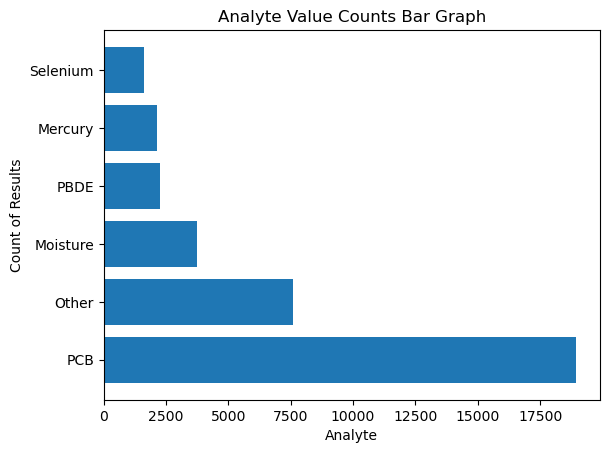

In [68]:
import matplotlib.pyplot as plt

value_counts = df2['Analyte'].value_counts()

plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Analyte')
plt.ylabel('Count of Results')
plt.title('Analyte Value Counts Bar Graph')
plt.show()

I am a little concerned about how many unique instances of PCB observed. I have no idea if it is reality that's being presented , or if something is skewing the data class. This is where the EDA about regarding the duplicate rows could answer. Also, as shown below, 60% of the PCB values are null. With what we have mentioned before, since null values could mean no records or not measured, I am going to set all nulls to 0.

In [69]:
results_null2 = df2.loc[df2['Result'].isnull()] 

In [70]:
results_null2['Analyte'].value_counts(normalize= True)

Analyte
PCB         0.590036
Other       0.293268
PBDE        0.075290
Selenium    0.040438
Mercury     0.000596
Moisture    0.000372
Name: proportion, dtype: float64

In [71]:
df2['Result'] = df2['Result'].fillna(value=0)

In [72]:
df2.isna().sum()

ProjectName               0
CompositeID               0
StationName               0
StationCode               0
Latitude                  0
Longitude                 0
GeometryShape          1901
EarliestDateSampled       0
CompositeType             0
CommonName                0
TissueName                0
NumberFishperComp        17
SampleTypeCode            0
CompositeReplicate        0
ResultReplicate           0
Analyte                   0
Unit                      0
Result                    0
OrganismGroup            28
WeightAvg(g)           4472
TLMax(mm)              4321
TLAvgLength(mm)        4321
CompSizeCheck          4321
SexSummary               17
TissueResultRowID         0
CompositeLatitude         0
CompositeLongitude        0
TotalCount               17
ForkLength             5300
TotalLength(mm)        4402
OrganismWeight(g)      4507
Age                    4919
Sex                    4586
TissueWeight(g)           0
CompositeWeight(g)        0
HomogonizedDate     

Still have duplicated values...for now, I will look into the null values. I will first look at the categorical columns

In [73]:
df2['GeometryShape'].value_counts() 
# I can just fill in nulls with 'Not Provided'

GeometryShape
PolygonCent     19765
Point           12078
Polygon          2176
Not Provided      238
PointCent          74
point              18
Name: count, dtype: int64

In [74]:
df2['GeometryShape'] = df2['GeometryShape'].fillna('Not Provided')

In [75]:
df2['GeometryShape'].value_counts()

GeometryShape
PolygonCent     19765
Point           12078
Polygon          2176
Not Provided     2139
PointCent          74
point              18
Name: count, dtype: int64

In [76]:
df2['Age'].value_counts() 
# this column is mono valued, meaning it doesn't give us any valuable info, drop it

Age
NR    31331
Name: count, dtype: int64

In [77]:
df2= df2.drop('Age',axis=1)

In [78]:
df2['Sex'].value_counts() 
#NR = Not Recorded & UNk = Unknown, we can combine these, and then put the nulls into Not Recorded

Sex
LAB    18403
M       4874
F       3992
NR      3875
Unk      520
Name: count, dtype: int64

In [79]:
df2['Sex'] = df2['Sex'].fillna('NR')

In [80]:
sex = df2['Sex'].str.contains('Unk')
df2.loc[sex, 'Sex'] = 'NR'
df2['Sex'].value_counts()

Sex
LAB    18403
NR      8981
M       4874
F       3992
Name: count, dtype: int64

Both the values LAB & NR are unknown sexes, LAB means they are still in the lab, unidentified, needs to be grouped into NR

In [81]:
sex = df2['Sex'].str.contains('LAB')
df2.loc[sex, 'Sex'] = 'NR'
df2['Sex'].value_counts()

Sex
NR    27384
M      4874
F      3992
Name: count, dtype: int64

Before looking into the numeric column null values, I need to reduce the number of features in the common name in order to make a more meaningful analysis. After doing extensive research, chemicals bioaccumulates exponentially up through the tropic levels. Forage fish are the primary consumers that serves as a stable food source for all larger species. They tend to feed on very small organisms. As a result, presences of contaminanes in forage fish would be a significant indicator of the severity of bioaccumulation up the trophic levels. If the chemical presence in forage fish is elevated, it would indicate that the environment is significantly impacted. They serve as a pivotal link between generally or microscopic organisms.

The way that makes the most sense to group them is by 1) Freshwater vs Saltwater Species, 2) Trophic levels. According to research, the trophic levels for my set of organisms are the following: 
* Freshwater Filter Feeders
* Freshwater Primary Consumer Forage
* Freshwater Omnivores Forage
* Freshwater Omnivores
* Freshwater Piscivores
* Freshwater Top Predators
* Saltwater Filter Feeders
* Saltwater Primary Consumer Forage
* Saltwater Omnivores
* Saltwater Piscivores Forage
* Saltwater Piscivores
* Saltwater Top Predators
* Primary Consumers


In [82]:
df2['CommonName'].value_counts()

CommonName
Largemouth Bass                  6444
Jacksmelt                        3251
Barred Surfperch                 3022
Common Carp                      2127
Tilapia spp.                     2104
Pacific Oyster                   2013
Channel Catfish                  1971
Bluegill                         1895
Flathead Catfish                 1329
Spotted Sand Bass                1320
Shiner Surfperch                 1129
Freshwater Clam                   996
Northern Anchovy                  985
California Mussel                 920
Rainbow Trout                     730
White Croaker                     570
Sacramento Sucker                 415
Striped Mullet                    374
Chub Mackerel                     343
White Surfperch                   341
Spotted Bass                      336
Blue Catfish                      285
California Corbina                279
Threadfin Shad                    252
Mississippi silverside            244
Green Sunfish                     235
R

In [83]:
df2['CommonName'].nunique()

96

In [84]:
df2['CommonName'].unique()

array(['Top Smelt', 'Channel Catfish', 'Northern Anchovy',
       'Largemouth Bass', 'Jacksmelt', 'Barred Surfperch',
       'Flathead Catfish', 'Rainbow Trout', 'Tilapia spp.', 'Bluegill',
       'Leopard shark', 'Redear Sunfish', 'Chinook Salmon',
       'Shiner Surfperch', 'Striped Mullet', 'Pacific Oyster',
       'Common Carp', 'Sacramento Sucker', 'Freshwater Clam',
       'Chub Mackerel', 'California Mussel', 'Sculpin', 'Kokanee',
       'California Corbina', 'Blue Catfish', 'Vermillion Rockfish',
       'Striped Bass', 'Green Sunfish', 'Brown Bullhead', 'White Croaker',
       'Spotted Sand Bass', 'Spotted Bass', 'Hitch', 'Blue Rockfish',
       'Mississippi silverside', 'White Surfperch', 'White Catfish',
       'Yellow shore crab', 'Smallmouth Bass', 'Black Rockfish',
       'Threadfin Shad', 'Sacramento Pikeminnow', 'Tule Perch',
       'Gopher Rockfish', 'Pile Surfperch', 'Black Crappie',
       'Walleye Surfperch', 'Asiatic Clam', 'Brown Rockfish',
       'Canary Rockfish'

In [85]:
df2['SpeciesGroup'] = "TBD" # add new column in main dataframe to be filled in as we filter and label

In [86]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),SpeciesGroup
1049,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,TBD
1582,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,TBD
2860,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,TBD
5258,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,NR,-88.0,-88.0,01/01/1950,10.6,TBD
5501,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,TBD


In [96]:
df2['Analyte'].value_counts()

Analyte
PCB         18945
Other        7574
Moisture     3729
PBDE         2261
Mercury      2116
Selenium     1625
Name: count, dtype: int64

In [87]:
fff=['Asiatic Clam','Freshwater Clam']
fpcf=['Threespine Stickleback', 'Longjaw Mudsucker']
fof=['Common Carp', 'Golden Shiner', 'Mosquitofish', 'Fathead Minnow', 'Red Shiner','Threadfin Shad', 'Mississippi Silverside', 'Mississippi silverside']
fo =['Crayfish','Hitch', 'Goldfish',' Red Swamp Crayfish', 'Red Swamp Crayfish']
fp=['Sacramento Sucker', 'Bluegill', 'Flathead Catfish', 'Largemouth Bass', 'Tilapia spp.', 'Green Sunfish', 'Spotted Bass', 'Channel Catfish', 'Redear Sunfish', 'Smallmouth Bass', 'Warmouth', 'Brown Bullhead', 'Blue Catfish', 'Black Crappie', 'Yellow Bullhead', 'Brown Trout', 'Lahontan Cutthroat Trout','Tule Perch', 'Sacramento Perch', 'Crappie', 'Hardhead','Lake Trout']
ftp=['Striped Bass', 'White Catfish', 'Kokanee', 'Chinook Salmon', 'Sacramento Pikeminnow', 'Rainbow Trout', 'Black Crappie']
sff=['Pacific Oyster', 'California Mussel']
spcf=['White Surfperch', 'Mississippi Silverside', 'Surf Smelt']
so=['Shiner Surfperch', 'Reef Perch', 'Shore Crab', 'Yellow Shore Crab', 'European Green Crab', 'Zebra Perch','Graceful Rock Crab','Yellow shore crab','European green crab','Shore crab' ]
spf=['Top Smelt', 'Jacksmelt', 'White Croaker', 'Northern Anchovy', 'Pacific Sardine', 'Surf Smelt']
sp=['Barred Surfperch', 'Spotted Sand Bass','Chub Mackerel', 'Black Perch', 'Pile Surfperch', 'Striped Surfperch', 'Walleye Surfperch', 'California Halibut', 'California Corbina', 'Rainbow Surfperch','Copper Rockfish', 'Black Rockfish', 'Sculpin', 'Leopard Shark', 'Pacific Staghorn Sculpin', 'Pacific Sanddab','Yellowfin Croaker']
stp=['Gopher Rockfish', 'Blue Rockfish', 'Brown Rockfish', 'Canary Rockfish', 'Spotfin Croaker', 'Striped Mullet', 'Leopard Shark','Leopard shark', 'Vermillion Rockfish', 'Pacific Bonito', 'Bat Ray', 'Olive Rockfish', 'Yellowtail Rockfish', 'Queenfish', 'Barred Sand Bass', 'Jack Mackerel', 'Deacon Rockfish', 'Pacific Angel Shark', 'Pacific Common Thresher Shark', 'Lingcod','California Spiny Lobster']
pc=['Zooplankton (un-identified)','Phytoplankton (un-identified)']

group = (fff,fpcf,fof,fo,fp,ftp,sff,spcf,so,spf,sp,stp,pc)
name = ('Freshwater Filter Feeders','Freshwater Primary Consumer Forage','Freshwater Omnivores Forage','Freshwater Omnivores','Freshwater Piscivores','Freshwater Top Predators','Saltwater Filter Feeders','Saltwater Primary Consumer Forage','Saltwater Omnivores','Saltwater Piscivores Forage','Saltwater Piscivores','Saltwater Top Predators','Primary Consumers')


In [88]:
for g, n in zip(group,name):
    filtered_group=df2['CommonName'].isin(g)
    df2.loc[filtered_group ,'SpeciesGroup']= n
print(df2['SpeciesGroup'].unique())


['Saltwater Piscivores Forage' 'Freshwater Piscivores'
 'Saltwater Piscivores' 'Freshwater Top Predators'
 'Saltwater Top Predators' 'Saltwater Omnivores'
 'Saltwater Filter Feeders' 'Freshwater Omnivores Forage'
 'Freshwater Filter Feeders' 'Freshwater Omnivores'
 'Saltwater Primary Consumer Forage' 'Primary Consumers'
 'Freshwater Primary Consumer Forage']


In [89]:
tbd=df2[df2['SpeciesGroup']=='TBD']
tbd['CommonName'].value_counts()

Series([], Name: count, dtype: int64)

In [90]:
df2.reset_index(drop=True, inplace=True)
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),SpeciesGroup
0,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,Saltwater Piscivores Forage
1,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,Saltwater Piscivores Forage
2,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,Saltwater Piscivores Forage
3,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,NR,-88.0,-88.0,01/01/1950,10.6,Saltwater Piscivores Forage
4,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,Saltwater Piscivores Forage


In [91]:
df2['SpeciesGroup'].nunique()

13

In [99]:
#Looking at the median & mean of the ohter numeric analysis columns


unit = ['WeightAvg(g)','TLMax(mm)','TLAvgLength(mm)','CompSizeCheck','ForkLength','TotalLength(mm)','OrganismWeight(g)','TLMin(mm)']



WeightAvg(g)        721.55      254.29
TLMax(mm)        332.0      302.0
TLAvgLength(mm)        293.89      261.0
CompSizeCheck        78.96      80.65
ForkLength        234.95      220.0
TotalLength(mm)        289.55      275.0
OrganismWeight(g)        692.34      220.0
TLMin(mm)        263.23      245.0


In [ ]:
#AGE

#plot the histogram
df['age'].plot(kind='hist')
#include vertical lines to indicate mean and median values
plt.axvline(df['age'].mean(), c = 'red', label='MEAN')
plt.axvline(df['age'].median(), c = 'orange', label='MEDIAN')
plt.legend() #allows us to see any LABELS

In [98]:
# first I need to add an unique identifying key to the master DF
df2['OrignalIndex'] = df2.index
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),SpeciesGroup,OrignalIndex
0,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,7.3,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",89AAB92E-2B69-4F06-949B-43E9C2973E4D,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,Saltwater Piscivores Forage,0
1,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,PCB,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",D02F5788-5800-4327-B4F7-827224925E7D,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,Saltwater Piscivores Forage,1
2,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",C09F1C74-5CE0-4526-98BF-95478D34FB22,33.7728,-118.132,27.0,NaN,1.00,-88.0,NR,-88.0,-88.0,01/01/1950,10.0,Saltwater Piscivores Forage,2
3,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",9C8BE6EF-AC1C-4F76-92CD-C639C2474334,33.7716,-118.133,26.0,NaN,1.06,-88.0,NR,-88.0,-88.0,01/01/1950,10.6,Saltwater Piscivores Forage,3
4,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,Other,ug/Kg ww,0.0,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",D45B2357-FD02-4C6A-8D30-A20DE2A8A66A,33.7716,-118.133,32.0,NaN,0.88,-88.0,NR,-88.0,-88.0,02/27/2019,8.8,Saltwater Piscivores Forage,4


In [94]:
df2['StationName'].nunique()

220

In [92]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_geo(df2, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="StationName",
                        )
fig.update_geos(visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

fig.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})


fig.show()